En este ejercicio vamos a usar datos de alojamientos de la plataforma AirBnB. El objetivo es
predecir el precio de alquiler de una propiedad (price) en función de los datos publicados en el
aviso. Cada grupo deberá seleccionar el archivo “Detailed Listings data” correspondiente a una
ciudad específica indicada aquí por el equipo docente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataSet = 'https://raw.githubusercontent.com/franzimbi/TA047R-2C2024-GRUPO03/refs/heads/main/tp1/dataSets/rio.csv?token=GHSAT0AAAAAACYBMO7W5NCPQGKI3ULPJTFMZYIGJDA'
dataSet = pd.read_csv(dataSet)

In [2]:
dataSet.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20240627045056,2024-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.77,4.67,NaN,f,1,1,0,0,1.88
1,25026,https://www.airbnb.com/rooms/25026,20240627045056,2024-06-28,city scrape,Beautiful Modern Decorated Studio in Copa,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,...,4.92,4.84,4.62,NaN,f,1,1,0,0,1.70
2,220377,https://www.airbnb.com/rooms/220377,20240627045056,2024-06-27,city scrape,Suíte Casal (banheiro privativo),The apartment is cozy and well located. The r...,Tijuca is a residential neigbohood in Rio clos...,https://a0.muscache.com/pictures/992d8e44-0ef1...,1142424,...,4.80,4.80,5.00,NaN,f,3,0,3,0,0.03
3,35764,https://www.airbnb.com/rooms/35764,20240627045056,2024-06-28,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,...,4.95,4.94,4.89,NaN,f,1,1,0,0,2.85
4,223073,https://www.airbnb.com/rooms/223073,20240627045056,2024-06-28,city scrape,Modern Loft 1 • Ipanema Posto 9 • 500 mb,READ THE FREQUENTLY ASKED QUESTIONS BELOW AND ...,DON'T KNOW IPANEMA? HERE SOME INFORMATION FOR ...,https://a0.muscache.com/pictures/e56d7053-8f27...,503995,...,4.98,4.97,4.73,NaN,t,7,7,0,0,3.04


In [3]:
dataSet.shape

(34664, 75)

# Limpieza

In [4]:
missing_values = dataSet.isna().sum()
print(missing_values[missing_values > 0])

description                      1163
neighborhood_overview           17648
host_location                    6795
host_about                      18113
host_response_time               5785
host_response_rate               5785
host_acceptance_rate             3575
host_is_superhost                 868
host_neighbourhood               5885
neighbourhood                   17648
neighbourhood_group_cleansed    34664
bathrooms                         840
bathrooms_text                     41
bedrooms                          138
beds                              842
price                             972
calendar_updated                34664
has_availability                  337
first_review                     8446
last_review                      8446
review_scores_rating             8446
review_scores_accuracy           8455
review_scores_cleanliness        8455
review_scores_checkin            8455
review_scores_communication      8455
review_scores_location           8455
review_score

In [5]:
# Porcentaje de valores nulos por columna
missing_values = dataSet.isnull().mean() * 100
print(missing_values.sort_values(ascending=False))

neighbourhood_group_cleansed    100.000000
license                         100.000000
calendar_updated                100.000000
host_about                       52.253058
neighbourhood                    50.911609
                                   ...    
maximum_maximum_nights            0.000000
minimum_nights_avg_ntm            0.000000
maximum_nights_avg_ntm            0.000000
host_listings_count               0.000000
id                                0.000000
Length: 75, dtype: float64


In [6]:
#Decidimos eliminar las columnas con 100% de valores nulos, ya que no aportan ningún dato
dataSet.drop(columns=['neighbourhood_group_cleansed', 'license', 'calendar_updated'], inplace=True)


In [7]:
#Convertimos host_about en una columna binaria indicando si el anfitrión proporciona o no una descripción.
dataSet['has_host_about'] = dataSet['host_about'].notnull().astype(int)
dataSet.drop(columns=['host_about'], inplace=True)  # Eliminar la columna original

In [8]:
# Verificar las primeras filas de ambas columnas
print(dataSet[['neighbourhood', 'neighbourhood_cleansed']].head())

# Verificar cuántos valores nulos tiene cada columna
print(dataSet[['neighbourhood', 'neighbourhood_cleansed']].isnull().sum())

# Contar la cantidad de valores únicos en cada columna
print(f"Valores únicos en 'neighbourhood': {dataSet['neighbourhood'].nunique()}")
print(f"Valores únicos en 'neighbourhood_cleansed': {dataSet['neighbourhood_cleansed'].nunique()}")


            neighbourhood neighbourhood_cleansed
0  Rio de Janeiro, Brazil             Copacabana
1  Rio de Janeiro, Brazil             Copacabana
2  Rio de Janeiro, Brazil                 Tijuca
3  Rio de Janeiro, Brazil             Copacabana
4  Rio de Janeiro, Brazil                Ipanema
neighbourhood             17648
neighbourhood_cleansed        0
dtype: int64
Valores únicos en 'neighbourhood': 262
Valores únicos en 'neighbourhood_cleansed': 152


In [9]:
# Dado que neighbourhood_cleansed no tiene valores nulos y menos valores únicos, sugiere que es más consistente y fácil de manejar.
# Decidimos eliminar la columna neighbourhood y conservar neighbourhood_cleansed.
dataSet.drop(columns=['neighbourhood'], inplace=True)

In [10]:
dataSet['neighborhood_overview'] = dataSet['neighborhood_overview'].fillna('No disponible')

In [11]:
print(dataSet['neighborhood_overview'].dropna().head(10))

0    This is the one of the bests spots in Rio. Bec...
1    Copacabana is a lively neighborhood and the ap...
2    Tijuca is a residential neigbohood in Rio clos...
3    Our guests will experience living with a local...
4    DON'T KNOW IPANEMA? HERE SOME INFORMATION FOR ...
5      Excellent part of Copacabana, close to Ipanema.
6    Barra da Tijuca, the neighborhood that grows i...
7    Enter Bossa Nova history by staying in the ver...
8                                        No disponible
9                                        No disponible
Name: neighborhood_overview, dtype: object



Se podría intentar hacer un "score" para los barrios haciendo analisis de estas reseñas ????


In [12]:
#Elimino columnas irrelevantes
dataSet.drop(columns=['listing_url', 'host_url','first_review','last_review','last_scraped','scrape_id','source','id', 'name', 'neighborhood_overview', 'picture_url',
                   'host_id', 'host_name', 'host_thumbnail_url', 'host_picture_url',
                   'calendar_last_scraped', 'latitude', 'longitude'], inplace=True)

In [13]:
# Eliminar símbolos de moneda y comas, y convertir a float
dataSet['price'] = dataSet['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Verificar que la conversión fue exitosa
print(dataSet['price'].dtype)

float64


In [14]:
# Porcentaje de valores nulos por columna
missing_values = dataSet.isnull().mean() * 100
print(missing_values.sort_values(ascending=False))

review_scores_value                             24.397069
review_scores_communication                     24.391299
review_scores_accuracy                          24.391299
review_scores_cleanliness                       24.391299
review_scores_checkin                           24.391299
review_scores_location                          24.391299
review_scores_rating                            24.365336
reviews_per_month                               24.365336
host_location                                   19.602469
host_neighbourhood                              16.977267
host_response_time                              16.688784
host_response_rate                              16.688784
host_acceptance_rate                            10.313293
description                                      3.355066
price                                            2.804062
host_is_superhost                                2.504039
beds                                             2.429033
bathrooms     

In [15]:
missing_values = dataSet.isna().sum()
print(missing_values[missing_values > 0])

description                    1163
host_location                  6795
host_response_time             5785
host_response_rate             5785
host_acceptance_rate           3575
host_is_superhost               868
host_neighbourhood             5885
bathrooms                       840
bathrooms_text                   41
bedrooms                        138
beds                            842
price                           972
has_availability                337
review_scores_rating           8446
review_scores_accuracy         8455
review_scores_cleanliness      8455
review_scores_checkin          8455
review_scores_communication    8455
review_scores_location         8455
review_scores_value            8457
reviews_per_month              8446
dtype: int64


In [16]:
dataSet['description'] = dataSet['description'].fillna("Sin descripción")

In [17]:
#Considero irrelevante datos del host y los elimino debido a cantidad de Nans.
columns_to_drop = ['host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood']
dataSet.drop(columns=columns_to_drop, inplace=True)

In [18]:
for col in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
            'review_scores_value', 'reviews_per_month']:
    dataSet[col] = dataSet[col].fillna(dataSet[col].median())

In [19]:
#Función para completar Nan bathrooms utilizando información de bathrooms_text
import re
import numpy as np

def extract_bathrooms(bathrooms_text):
    if pd.isnull(bathrooms_text):
        return np.nan

    bathrooms_text = bathrooms_text.lower()
    if "half-bath" in bathrooms_text or "shared" in bathrooms_text:
        return 0.5

    match = re.search(r'(\d+\.?\d*)', bathrooms_text)
    if match:
        return float(match.group(1))

    return np.nan

dataSet['extracted_bathrooms'] = dataSet['bathrooms_text'].apply(extract_bathrooms)

dataSet['bathrooms'] = dataSet['bathrooms'].fillna(dataSet['extracted_bathrooms'])

In [20]:
dataSet.drop(columns=['bathrooms_text'], inplace=True)

In [21]:
dataSet.drop(columns=['extracted_bathrooms'], inplace=True)


Para rellenar los valores nulos en bedrooms y beds, agrupamos los datos por la cantidad de bathrooms y calculamos los promedios de bedrooms y beds para cada grupo. Luego, usamos estos promedios para completar los valores nulos, lo que asegura que los datos sean más coherentes y reflejen la relación lógica entre el número de baños, habitaciones y camas.

In [22]:
# Paso 1: Agrupar por 'bathrooms' y calcular el promedio de 'bedrooms' y 'beds'
average_beds_bedrooms = dataSet.groupby('bathrooms').agg({'bedrooms': 'median', 'beds': 'median'}).reset_index()

# Paso 2: Crear una función para rellenar los NaNs en 'bedrooms' y 'beds'
def fill_na_beds_bedrooms(row):
    # Si bedrooms es NaN, intenta calcularlo
    if pd.isnull(row['bedrooms']):
        avg_bedroom = average_beds_bedrooms.loc[average_beds_bedrooms['bathrooms'] == row['bathrooms'], 'bedrooms']
        if not avg_bedroom.empty and not pd.isnull(avg_bedroom.values[0]):
            return round(avg_bedroom.values[0])  # Redondear a entero

    # Si beds es NaN, intenta calcularlo
    if pd.isnull(row['beds']):
        avg_beds = average_beds_bedrooms.loc[average_beds_bedrooms['bathrooms'] == row['bathrooms'], 'beds']
        if not avg_beds.empty and not pd.isnull(avg_beds.values[0]):
            return round(avg_beds.values[0])  # Redondear a entero

    return row['bedrooms'], row['beds']  # Devolver los valores originales si no hay NaNs

# Paso 3: Aplicar la función a cada fila del DataFrame
dataSet[['bedrooms', 'beds']] = dataSet.apply(fill_na_beds_bedrooms, axis=1, result_type='expand')

# Paso 4: Verificar si hay valores nulos restantes
print(dataSet[['bedrooms', 'beds']].isnull().sum())


bedrooms    1
beds        4
dtype: int64


Infiere cantidad de habitaciones y camas faltantes, utilizando la información una columna de la otra.

In [23]:
def infer_bedrooms_and_beds(row):
    bedrooms = row['bedrooms']
    beds = row['beds']

    if pd.isnull(bedrooms) and not pd.isnull(beds):
        # Inferir bedrooms asumiendo 1 camas por dormitorio
        bedrooms = beds
    elif pd.isnull(beds) and not pd.isnull(bedrooms):
        # Inferir beds asumiendo 1 camas por dormitorio
        beds = bedrooms

    return pd.Series([bedrooms, beds])

# Aplicar la función a cada fila y expandir el resultado en dos columnas
dataSet[['bedrooms', 'beds']] = dataSet.apply(infer_bedrooms_and_beds, axis=1)

# Rellenar cualquier valor nulo restante con la mediana
dataSet['bedrooms'] = dataSet['bedrooms'].fillna(dataSet['bedrooms'].median())
dataSet['beds'] = dataSet['beds'].fillna(dataSet['beds'].median())


Manejo valores Nan restantes en bathrooms con información de habitaciones

In [24]:
def infer_bathrooms(row):
    if pd.isnull(row['bathrooms']):
        # Suponiendo que en promedio hay un baño por cada 2 dormitorios
        if pd.notnull(row['bedrooms']) and row['bedrooms'] > 0:
            return row['bedrooms'] / 2
        return 0
    return row['bathrooms']

# Rellenar los valores nulos en 'bathrooms'
dataSet['bathrooms'] = dataSet.apply(infer_bathrooms, axis=1)

In [25]:
# Rellenar nulos en 'has_availability' con t (asumiendo que la mayoría están disponibles)
dataSet['has_availability'] = dataSet['has_availability'].fillna('t')

Imputamos Price

In [26]:
# Imputación usando bedrooms y bathrooms
mean_price_bath_bed = dataSet.groupby(['bedrooms', 'bathrooms'])['price'].mean().reset_index()
mean_price_bath_bed.rename(columns={'price': 'mean_price'}, inplace=True)

# Realizar el merge
dataSet = dataSet.merge(mean_price_bath_bed, on=['bedrooms', 'bathrooms'], how='left')

# Rellenar los valores nulos en 'price' con 'mean_price'
dataSet['price'] = dataSet['price'].fillna(dataSet['mean_price'])
dataSet.drop('mean_price', axis=1, inplace=True)

# Luego, si aún hay nulos, usar solo neighbourhood_cleansed
mean_price_neighbourhood = dataSet.groupby(['neighbourhood_cleansed'])['price'].mean().reset_index()
mean_price_neighbourhood.rename(columns={'price': 'mean_price'}, inplace=True)

# Realizar el merge
dataSet = dataSet.merge(mean_price_neighbourhood, on=['neighbourhood_cleansed'], how='left')

# Rellenar los valores nulos en 'price' con 'mean_price'
dataSet['price'] = dataSet['price'].fillna(dataSet['mean_price'])
dataSet.drop('mean_price', axis=1, inplace=True)

# Por último, rellenar con la media general si aún hay nulos
overall_mean_price = dataSet['price'].mean()
dataSet['price'] = dataSet['price'].fillna(overall_mean_price)

In [27]:
missing_values = dataSet.isna().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


# Outliers

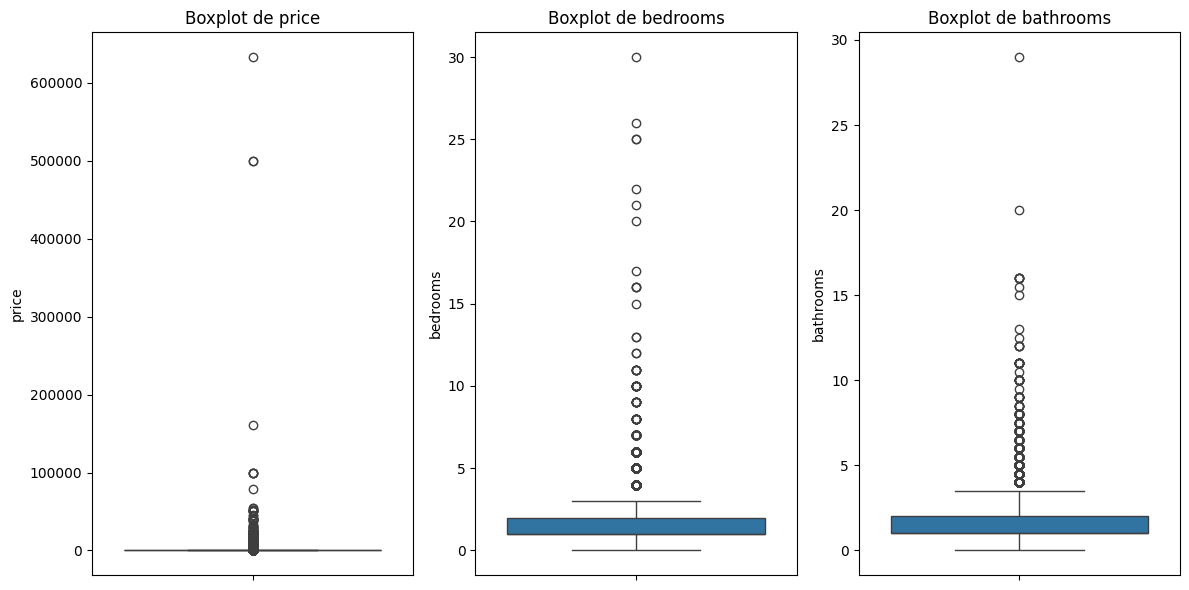

In [28]:
# Definir las variables clave para el boxplot
variables_clave = ['price', 'bedrooms', 'bathrooms']

# Crear un boxplot para cada variable
plt.figure(figsize=(12, 6))
for i, var in enumerate(variables_clave, 1):
    plt.subplot(1, 3, i)  # Subplots para organizar los boxplots
    sns.boxplot(y=dataSet[var])
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()


In [29]:
dataSet_filtrado = dataSet[(dataSet['bedrooms'] <= 10) & (dataSet['bathrooms'] <= 10)]

# Verificamos cuántas filas quedaron después del filtrado
print(f"Número de propiedades sin eliminar outliers: {dataSet.shape[0]}")
print(f"Número de propiedades después de eliminar outliers: {dataSet_filtrado.shape[0]}")


Número de propiedades sin eliminar outliers: 34664
Número de propiedades después de eliminar outliers: 34626


In [30]:
dataSet = dataSet[dataSet['bedrooms'] > 0]
dataSet = dataSet[dataSet['beds'] > 0]
dataSet = dataSet[dataSet['bathrooms'] > 0]

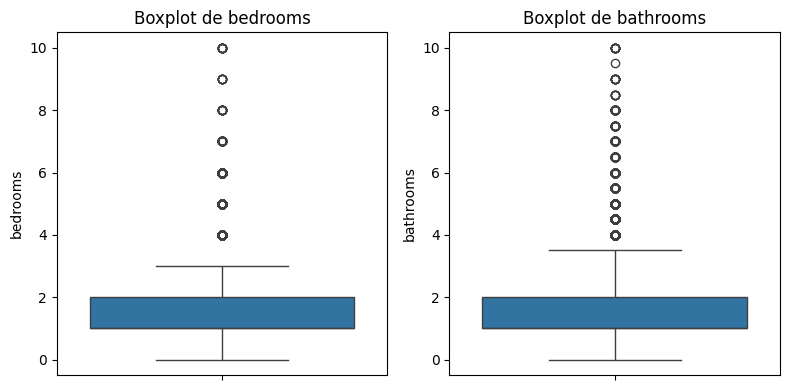

In [31]:
variables_clave = ['bedrooms', 'bathrooms']

# Crear un boxplot para cada variable
plt.figure(figsize=(8, 4))  # Ajustamos el tamaño para solo 2 variables
for i, var in enumerate(variables_clave, 1):
    plt.subplot(1, 2, i)  # Subplots para organizar dos boxplots
    sns.boxplot(y=dataSet_filtrado[var])  # Usamos el dataset filtrado
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

In [32]:
stats_with_outliers = dataSet[['bedrooms', 'bathrooms']].describe()

# Estadísticas descriptivas sin outliers
stats_without_outliers = dataSet_filtrado[['bedrooms', 'bathrooms']].describe()

# Imprimir resultados
print("Estadísticas con outliers:\n", stats_with_outliers)
print("\nEstadísticas sin outliers:\n", stats_without_outliers)

Estadísticas con outliers:
            bedrooms     bathrooms
count  30513.000000  30513.000000
mean       1.631305      1.584210
std        1.023136      0.999367
min        1.000000      0.500000
25%        1.000000      1.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       30.000000     20.000000

Estadísticas sin outliers:
            bedrooms     bathrooms
count  34626.000000  34626.000000
mean       1.547363      1.539623
std        0.963100      0.942508
min        0.000000      0.000000
25%        1.000000      1.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       10.000000     10.000000


In [33]:
dataSet = dataSet_filtrado.copy()

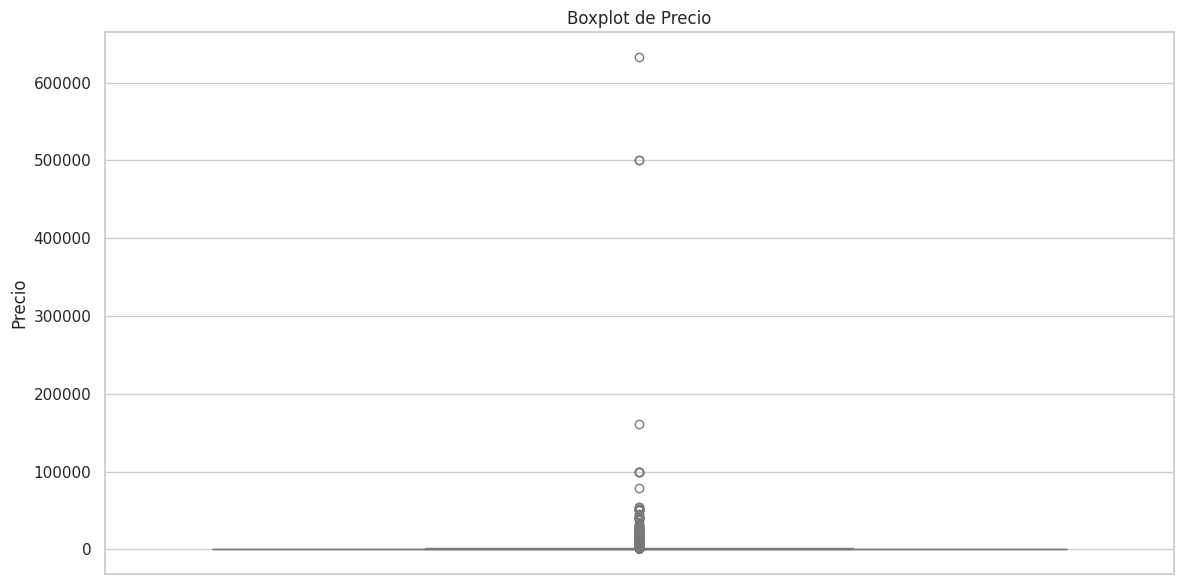

In [34]:
sns.set(style="whitegrid")

# Crear un boxplot para 'price' en un subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)  # Un solo subplot
sns.boxplot(y=dataSet['price'], color='lightblue')  # Boxplot vertical
plt.title('Boxplot de Precio')
plt.ylabel('Precio')
plt.tight_layout()  # Ajustar el layout
plt.show()

In [35]:
dataSet = dataSet[dataSet['price'] > 0]

In [36]:
Q1 = dataSet['price'].quantile(0.25)
Q3 = dataSet['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
dataSet_filtrado_price = dataSet[(dataSet['price'] >= lower_bound) & (dataSet['price'] <= upper_bound)]

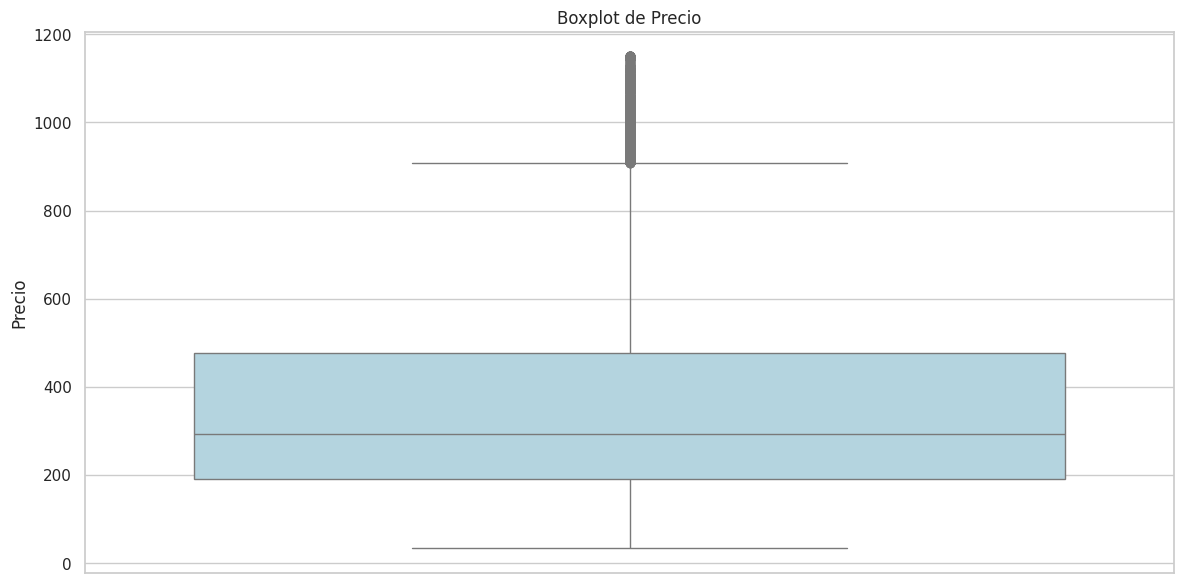

In [37]:
sns.set(style="whitegrid")

# Crear un boxplot para 'price' en un subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)  # Un solo subplot
sns.boxplot(y=dataSet_filtrado_price['price'], color='lightblue')  # Boxplot vertical
plt.title('Boxplot de Precio')
plt.ylabel('Precio')
plt.tight_layout()  # Ajustar el layout
plt.show()

In [38]:
stats_with_outliers = dataSet[['price']].describe()

# Estadísticas descriptivas sin outliers
stats_without_outliers = dataSet_filtrado_price[['price']].describe()

# Imprimir resultados
print("Estadísticas con outliers:\n", stats_with_outliers)
print("\nEstadísticas sin outliers:\n", stats_without_outliers)

Estadísticas con outliers:
                price
count   34625.000000
mean      726.180479
std      5583.527347
min        33.000000
25%       200.000000
50%       318.000000
75%       580.032832
max    633125.000000

Estadísticas sin outliers:
               price
count  31186.000000
mean     363.973467
std      238.097740
min       33.000000
25%      190.000000
50%      293.000000
75%      476.921468
max     1150.000000


El análisis indica que los outliers distorcionan las estadísticas, lo que podría afectar el rendimiento de los modelos de predicción.

In [39]:
dataSet = dataSet_filtrado_price.copy()

# Nuevos features

Genero columnas nuevas para tipos de propiedades y tipos de habitaciones, esto puede servir para nuestro analisis futuro

In [40]:
# Ver los conteos de valores para 'property_type'
property_type_counts = dataSet['property_type'].value_counts()
print("Conteos de 'property_type':")
print(property_type_counts)

# Ver los conteos de valores para 'room_type'
room_type_counts = dataSet['room_type'].value_counts()
print("\nConteos de 'room_type':")
print(room_type_counts)

Conteos de 'property_type':
property_type
Entire rental unit              19721
Private room in rental unit      3990
Entire condo                     1524
Private room in home             1171
Entire home                      1044
                                ...  
Private room in resort              1
Shared room in vacation home        1
Private room in cottage             1
Dome                                1
Private room in tower               1
Name: count, Length: 79, dtype: int64

Conteos de 'room_type':
room_type
Entire home/apt    24138
Private room        6437
Shared room          586
Hotel room            25
Name: count, dtype: int64


In [41]:
# Definir el umbral de frecuencia para considerar una categoría como "común"
umbral_frecuencia = 1000  # Por ejemplo, categorías con más de 1000 ocurrencias

# Obtener conteos de las categorías
conteos_property_type = dataSet['property_type'].value_counts()

# Crear una lista de categorías comunes
categorias_comunes = conteos_property_type[conteos_property_type >= umbral_frecuencia].index.tolist()

# Reemplazar categorías poco frecuentes por "Otros"
dataSet['property_type'] = dataSet['property_type'].apply(lambda x: x if x in categorias_comunes else 'Otros')


In [42]:
property_type_counts = dataSet['property_type'].value_counts()
print("Conteos de 'property_type':")
print(property_type_counts)

Conteos de 'property_type':
property_type
Entire rental unit             19721
Private room in rental unit     3990
Otros                           3736
Entire condo                    1524
Private room in home            1171
Entire home                     1044
Name: count, dtype: int64


In [43]:
# Crear variables dummy para 'property_type' y 'room_type'
dummies_property_type = pd.get_dummies(dataSet['property_type'], prefix='property')
dummies_room_type = pd.get_dummies(dataSet['room_type'], prefix='room')

dataSet = pd.concat([dataSet, dummies_property_type, dummies_room_type], axis=1)

dataSet.drop(['property_type', 'room_type'], axis=1, inplace=True)

Consideramos que las 'amenities' pueden tener influencia en el precio, deberíamos manejarlas para aprovecharlas.

In [44]:
# Ver los primeros 5 valores de la columna 'amenities'
print(dataSet['amenities'].head(10))

0     ["Smoking allowed", "Essentials", "Air conditi...
1     ["Fast wifi \u2013 501 Mbps", "Essentials", "H...
2     ["Essentials", "Air conditioning", "Hangers", ...
3     ["Essentials", "Hangers", "Window AC unit", "B...
4     ["Fast wifi \u2013 543 Mbps", "Essentials", "F...
5     ["Kitchen", "Refrigerator", "Bed linens", "TV"...
6     ["Beach essentials", "Essentials", "Hangers", ...
8     ["Essentials", "Air conditioning", "Hangers", ...
9     ["Kitchen", "TV", "Air conditioning", "Wifi", ...
10    ["Smoking allowed", "Essentials", "Hangers", "...
Name: amenities, dtype: object


In [45]:
import ast

# Paso 1: Convertir la columna 'amenities' de cadena a lista
dataSet['amenities'] = dataSet['amenities'].apply(ast.literal_eval)

# Paso 2: Crear una nueva columna 'amenities_count' que cuente el número de amenidades
dataSet['amenities_count'] = dataSet['amenities'].apply(len)

dataSet['amenities'] = dataSet['amenities_count']

# Paso 3: Eliminar la columna 'amenities_count'
dataSet.drop('amenities_count', axis=1, inplace=True)

Relación Directa con el Precio: Utilizar el precio promedio de cada barrio, cómo se comportan los precios en cada ubicación, podría ser relevante para la predicción.

In [46]:
# Calcular el precio promedio por barrio
mean_price_per_neighbourhood = dataSet.groupby('neighbourhood_cleansed')['price'].mean()

# Mapear el precio promedio al conjunto de datos
dataSet['neighbourhood_encoded'] = dataSet['neighbourhood_cleansed'].map(mean_price_per_neighbourhood)
dataSet.drop('neighbourhood_cleansed', axis=1, inplace=True)

In [47]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31186 entries, 0 to 34663
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   description                                   31186 non-null  object 
 1   host_since                                    31186 non-null  object 
 2   host_listings_count                           31186 non-null  int64  
 3   host_total_listings_count                     31186 non-null  int64  
 4   host_verifications                            31186 non-null  object 
 5   host_has_profile_pic                          31186 non-null  object 
 6   host_identity_verified                        31186 non-null  object 
 7   accommodates                                  31186 non-null  int64  
 8   bathrooms                                     31186 non-null  float64
 9   bedrooms                                      31186 non-null  floa

In [48]:
dataSet['has_availability'] = dataSet['has_availability'].map({'t': 1, 'f': 0})

In [49]:
print(dataSet['has_availability'].unique())

[1 0]


In [50]:
dataSet['instant_bookable'] = dataSet['instant_bookable'].map({'t': 1, 'f': 0})

Variables relacionadas al host

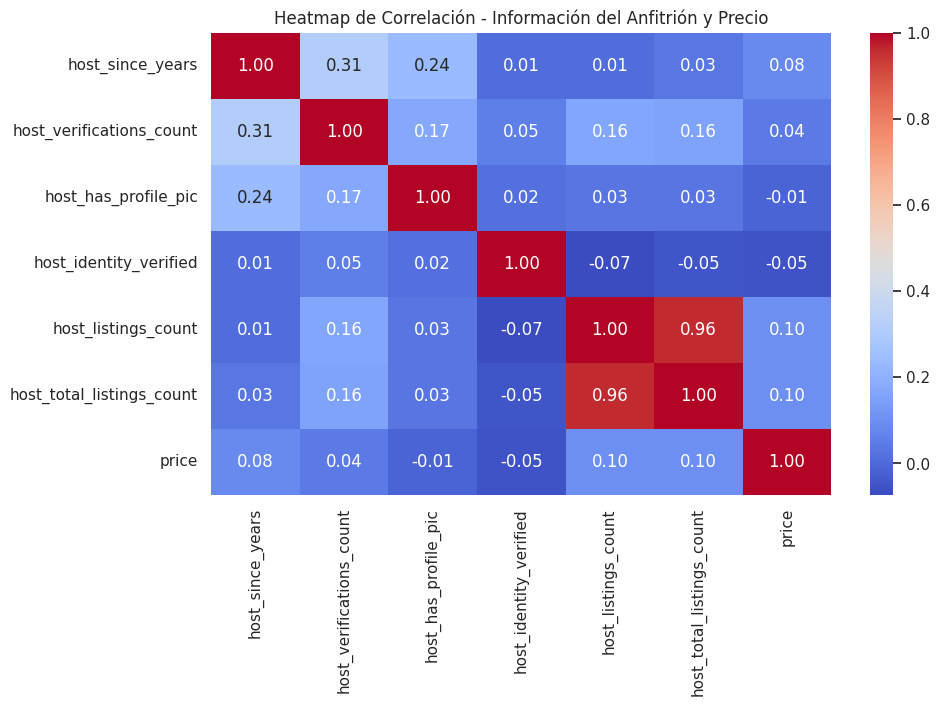

In [51]:
host_columns = [
    'host_since',
    'host_verifications',
    'host_has_profile_pic',
    'host_identity_verified',
    'host_listings_count',
    'host_total_listings_count',
    'price'
]

# Filtrar el DataFrame para incluir solo las columnas del anfitrión y el precio
host_data = dataSet[host_columns].copy()

host_data['host_since'] = pd.to_datetime(host_data['host_since'], errors='coerce')

# Calcular los años desde que el anfitrión se registró
host_data['host_since_years'] = (pd.to_datetime('now') - host_data['host_since']).dt.days // 365

# Contar verificaciones, si es necesario (asumiendo que es una cadena de texto)
host_data['host_verifications_count'] = host_data['host_verifications'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Convertir variables binarias
host_data['host_has_profile_pic'] = host_data['host_has_profile_pic'].map({'t': 1, 'f': 0})
host_data['host_identity_verified'] = host_data['host_identity_verified'].map({'t': 1, 'f': 0})

# Seleccionar columnas relevantes
host_data_filtered = host_data[['host_since_years', 'host_verifications_count', 'host_has_profile_pic',
                                  'host_identity_verified', 'host_listings_count',
                                  'host_total_listings_count', 'price']]

# Cálculo de la matriz de correlación
correlation_matrix = host_data_filtered.corr()

# Creación del heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap de Correlación - Información del Anfitrión y Precio')
plt.show()

In [52]:
def calculate_host_reliability(row):
    # Asignar 1 si el anfitrión tiene una foto de perfil y está verificado, de lo contrario 0
    return int(row['host_has_profile_pic'] == 't') + \
           int(row['host_identity_verified'] == 't') + \
           int(row['host_verifications'] != '')

dataSet['host_reliability'] = dataSet.apply(calculate_host_reliability, axis=1)

In [53]:
#Elimino columnas inmanejables-irrelevantes-o que ya trabajamos
dataSet.drop(columns=['host_verifications', 'host_has_profile_pic', 'host_identity_verified','description', 'host_since'], inplace=True)

In [54]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31186 entries, 0 to 34663
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           31186 non-null  int64  
 1   host_total_listings_count                     31186 non-null  int64  
 2   accommodates                                  31186 non-null  int64  
 3   bathrooms                                     31186 non-null  float64
 4   bedrooms                                      31186 non-null  float64
 5   beds                                          31186 non-null  float64
 6   amenities                                     31186 non-null  int64  
 7   price                                         31186 non-null  float64
 8   minimum_nights                                31186 non-null  int64  
 9   maximum_nights                                31186 non-null  int6

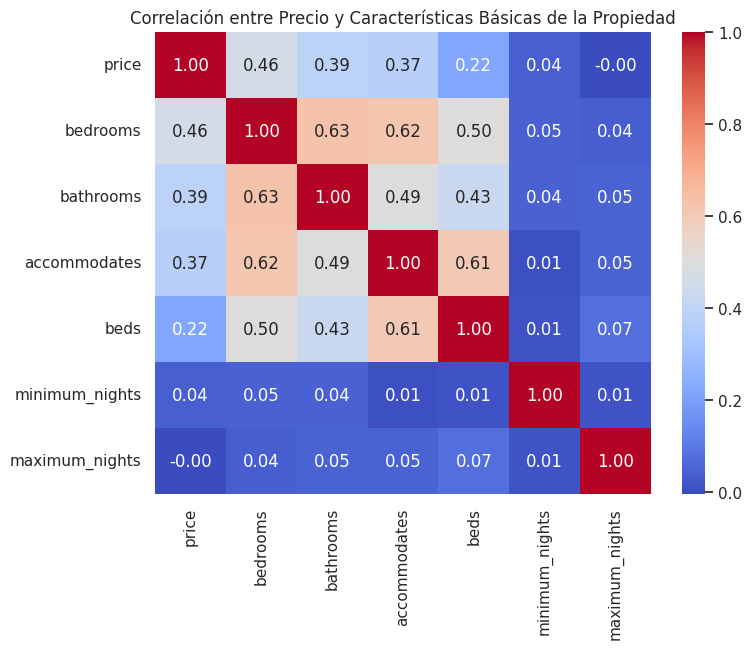

In [55]:
# Lista de columnas para el primer heatmap
heatmap1_columns = ['price', 'bedrooms', 'bathrooms', 'accommodates', 'beds', 'minimum_nights', 'maximum_nights']
filtered_heatmap1 = dataSet[heatmap1_columns]

# Cálculo de la matriz de correlación
correlation_matrix1 = filtered_heatmap1.corr()

# Creación del heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix1, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlación entre Precio y Características Básicas de la Propiedad')
plt.show()

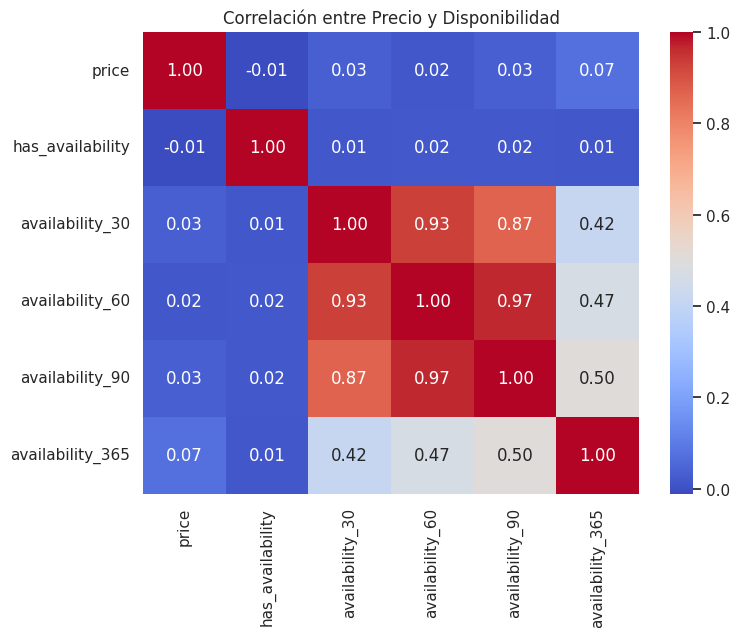

In [56]:
# Lista de columnas para el segundo heatmap
heatmap2_columns = ['price', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365']
filtered_heatmap2 = dataSet[heatmap2_columns]

# Cálculo de la matriz de correlación
correlation_matrix2 = filtered_heatmap2.corr()

# Creación del heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlación entre Precio y Disponibilidad')
plt.show()

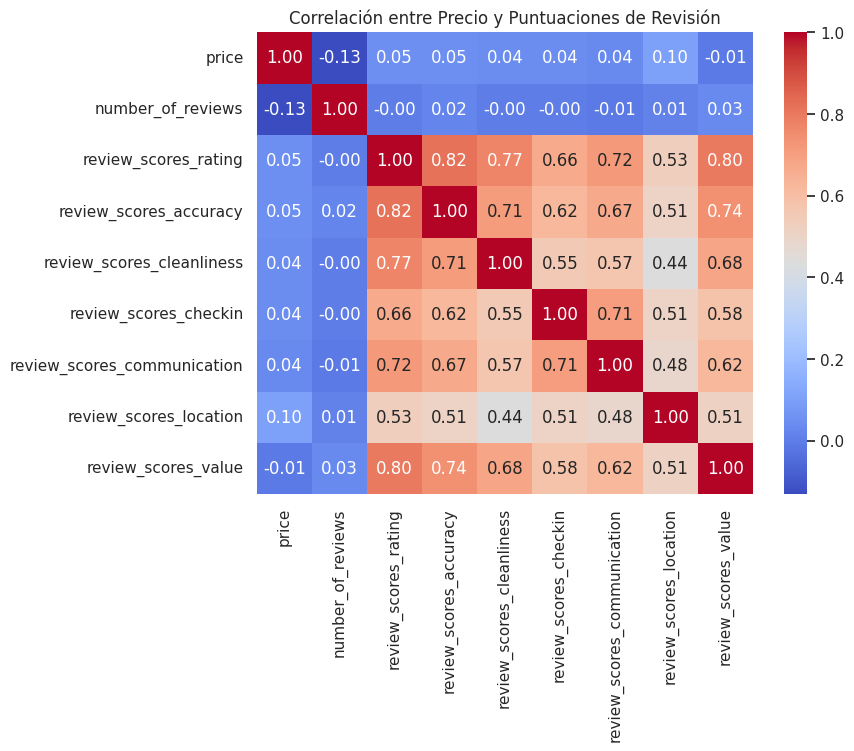

In [57]:
# Lista de columnas para el tercer heatmap
heatmap3_columns = ['price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                    'review_scores_location', 'review_scores_value']
filtered_heatmap3 = dataSet[heatmap3_columns]

# Cálculo de la matriz de correlación
correlation_matrix3 = filtered_heatmap3.corr()

# Creación del heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix3, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlación entre Precio y Puntuaciones de Revisión')
plt.show()

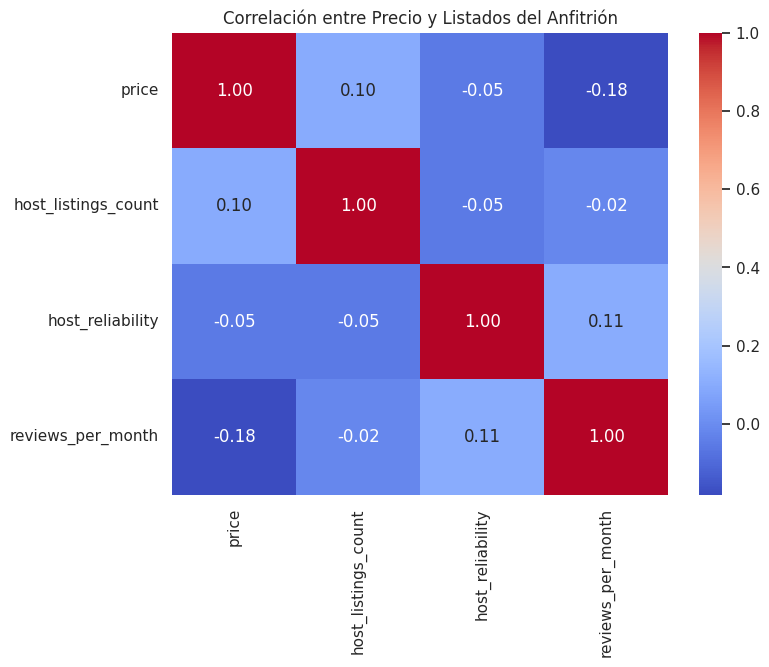

In [58]:
# Lista de columnas para el cuarto heatmap
heatmap4_columns = ['price', 'host_listings_count', 'host_reliability', 'reviews_per_month']
filtered_heatmap4 = dataSet[heatmap4_columns]

# Cálculo de la matriz de correlación
correlation_matrix4 = filtered_heatmap4.corr()

# Creación del heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix4, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlación entre Precio y Listados del Anfitrión')
plt.show()

In [59]:
#Veo que estas columnas no tienen correlación significativa con el precio
columnas_a_eliminar = [
    'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
    'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','has_availability', 'availability_30',
    'availability_60', 'availability_90', 'availability_365','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
    'host_total_listings_count','host_reliability', 'reviews_per_month'
]

dataSet = dataSet.drop(columns=columnas_a_eliminar)

Creo nuevas variables, utilizando las que más correlación tienen con price

In [60]:
# Precio por dormitorio (evitar división por cero)
dataSet['price_per_bedroom'] = np.where(dataSet['bedrooms'] > 0, dataSet['price'] / dataSet['bedrooms'], 0)

# Capacidad por baño (evitar división por cero)
dataSet['accommodates_per_bathroom'] = np.where(dataSet['bathrooms'] > 0, dataSet['accommodates'] / dataSet['bathrooms'], 0)

# Camas por dormitorio (evitar división por cero)
dataSet['beds_per_bedroom'] = np.where(dataSet['bedrooms'] > 0, dataSet['beds'] / dataSet['bedrooms'], 0)

# Espacio total (dormitorios + baños) - no hay división, así que no hay riesgo de infinito
dataSet['total_space'] = dataSet['bedrooms'] + dataSet['bathrooms']

# Relación entre capacidad y dormitorios (evitar división por cero)
dataSet['accommodates_per_bedroom'] = np.where(dataSet['bedrooms'] > 0, dataSet['accommodates'] / dataSet['bedrooms'], 0)

# Combinación de camas, baños y capacidad (puntaje de lujo)
dataSet['luxury_score'] = np.where(dataSet['accommodates'] > 0, (dataSet['beds'] + dataSet['bathrooms']) / dataSet['accommodates'], 0)

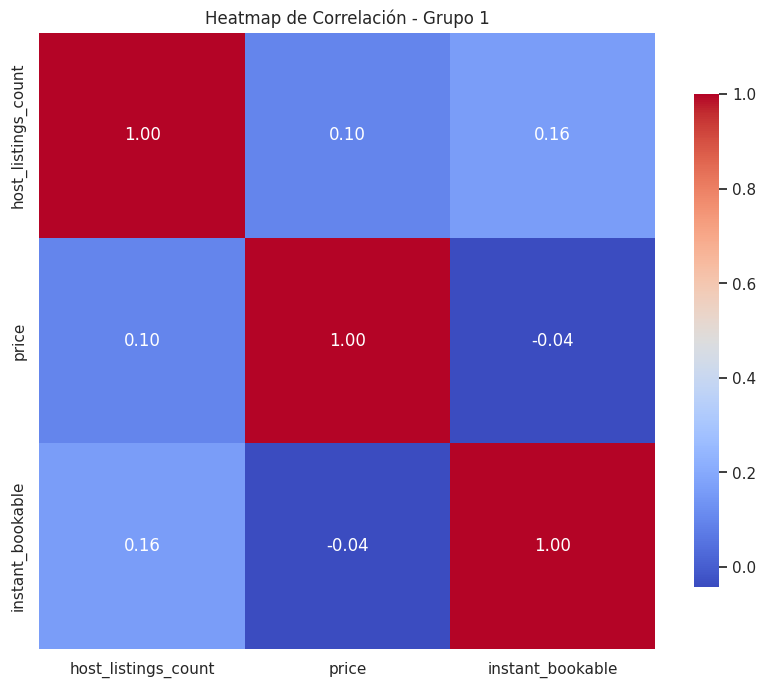

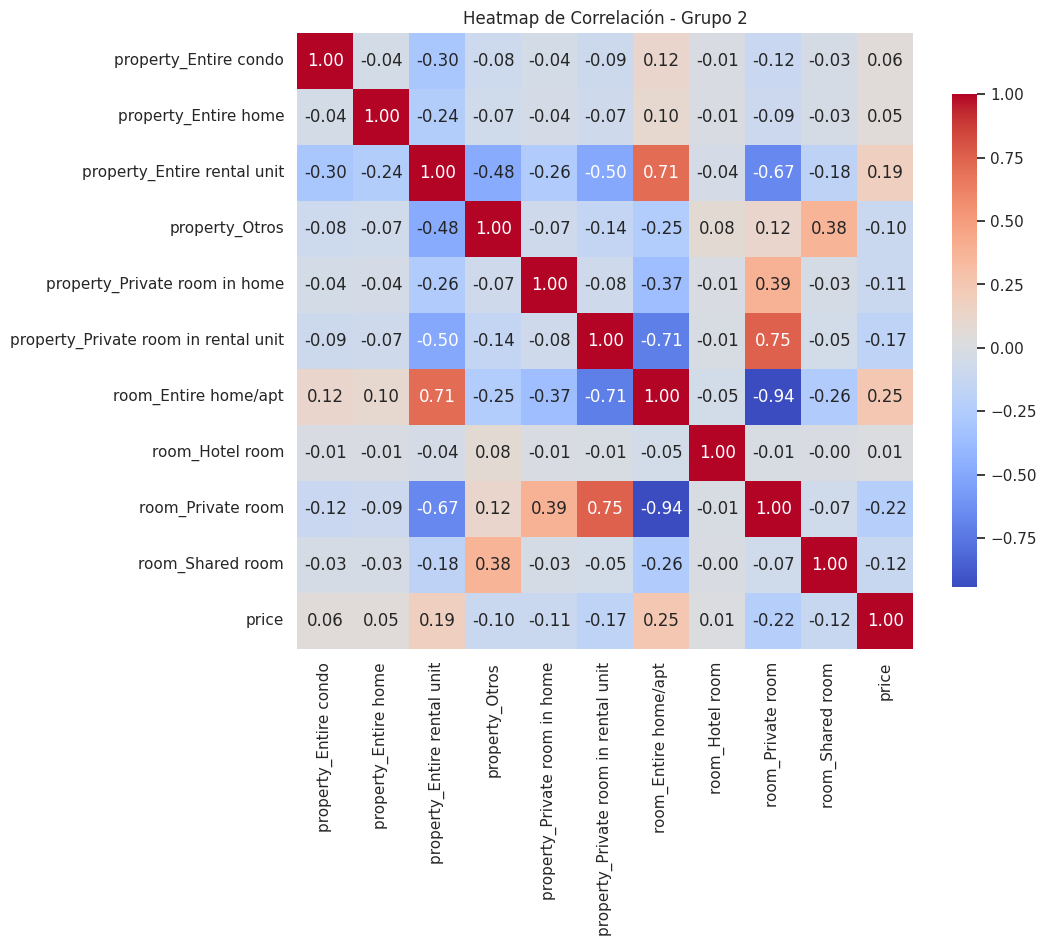

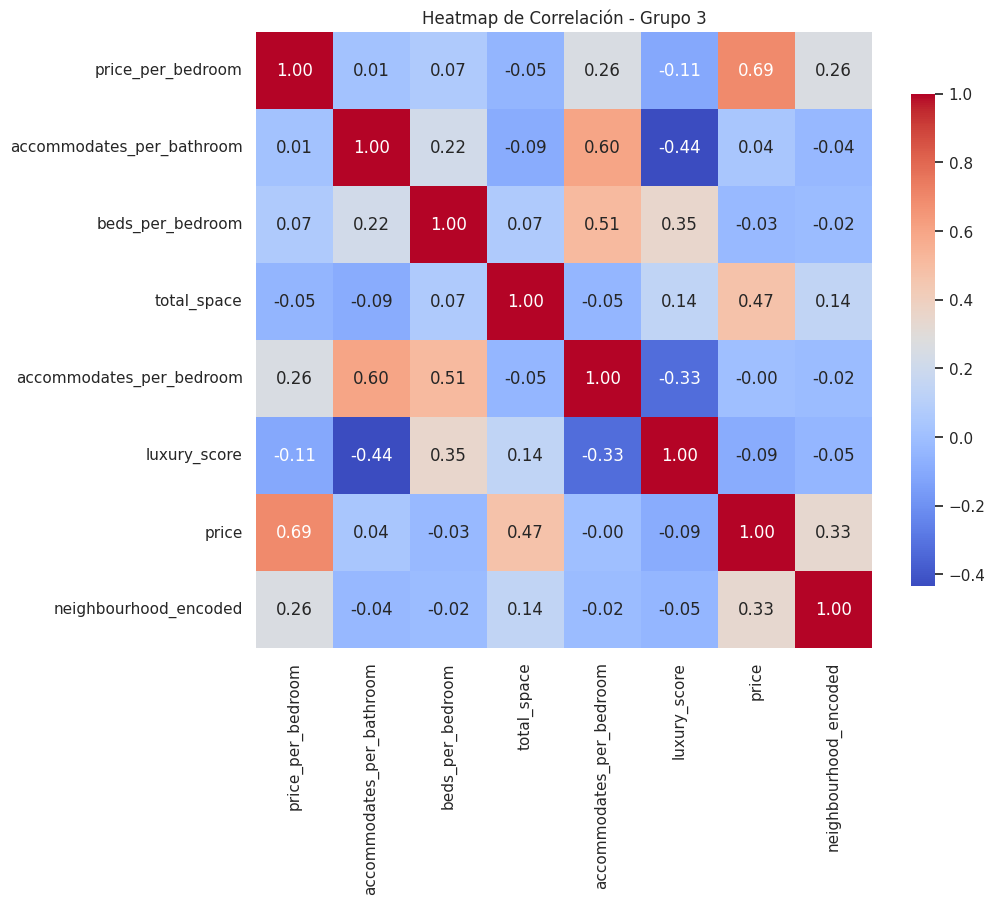

In [61]:
heatmap_groups = [
    ['host_listings_count', 'price', 'instant_bookable'],
    ['property_Entire condo', 'property_Entire home', 'property_Entire rental unit',
     'property_Otros', 'property_Private room in home', 'property_Private room in rental unit',
     'room_Entire home/apt', 'room_Hotel room', 'room_Private room', 'room_Shared room',
     'price'],
    ['price_per_bedroom', 'accommodates_per_bathroom', 'beds_per_bedroom',
     'total_space', 'accommodates_per_bedroom', 'luxury_score', 'price','neighbourhood_encoded']
]

# Generar heatmaps
for i, group in enumerate(heatmap_groups):
    plt.figure(figsize=(10, 8))
    correlation_matrix = dataSet[group].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title(f'Heatmap de Correlación - Grupo {i+1}')
    plt.show()

# Visualizaciones

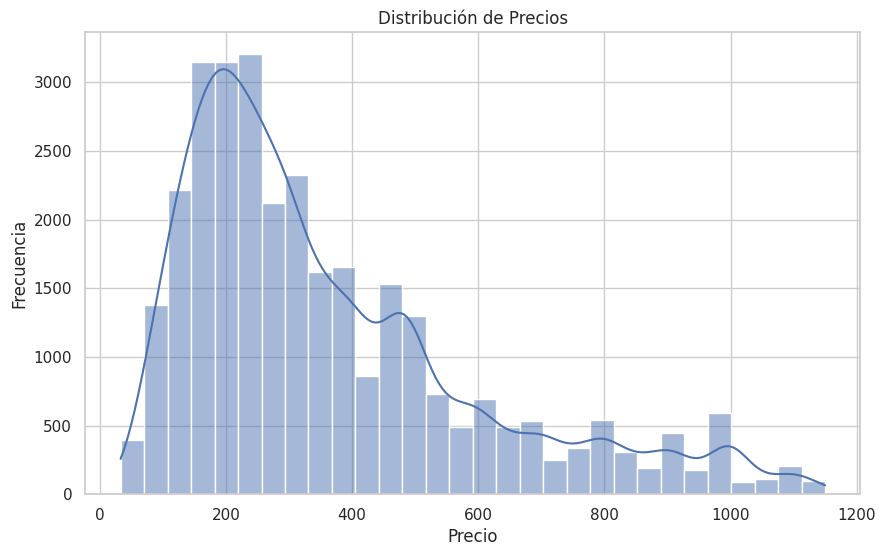

In [62]:
# Histograma del precio
plt.figure(figsize=(10, 6))
sns.histplot(dataSet['price'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [63]:
# prompt: mostrame columnas en vertical

# Imprime las columnas en vertical
for column in dataSet.columns:
  print(column)


host_listings_count
accommodates
bathrooms
bedrooms
beds
amenities
price
number_of_reviews_ltm
number_of_reviews_l30d
instant_bookable
calculated_host_listings_count
calculated_host_listings_count_entire_homes
calculated_host_listings_count_private_rooms
calculated_host_listings_count_shared_rooms
has_host_about
property_Entire condo
property_Entire home
property_Entire rental unit
property_Otros
property_Private room in home
property_Private room in rental unit
room_Entire home/apt
room_Hotel room
room_Private room
room_Shared room
neighbourhood_encoded
price_per_bedroom
accommodates_per_bathroom
beds_per_bedroom
total_space
accommodates_per_bedroom
luxury_score


# Entrenamiento y Predicción

In [64]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [65]:
from sklearn.model_selection import train_test_split

X = dataSet.drop('price', axis=1)
y = dataSet['price']

# Divide el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Regresión Lineal Múltiple

In [66]:
# Crear y ajustar el modelo
modelo_lineal_multiple = LinearRegression()
modelo_lineal_multiple.fit(X_train, y_train)

# Coeficientes estimados
B = modelo_lineal_multiple.coef_  # No necesitas [0]
intercept = modelo_lineal_multiple.intercept_  # No necesitas [0]

# Mostrar el modelo
coeficientes = {f'B{i+1}': round(coef, 2) for i, coef in enumerate(B)}
coeficientes['B0'] = round(intercept, 2)
print(f"El modelo lineal múltiple ajustado es: price = {coeficientes}")

El modelo lineal múltiple ajustado es: price = {'B1': 0.07, 'B2': 54.98, 'B3': 14.03, 'B4': 10.89, 'B5': -3.65, 'B6': 0.02, 'B7': -0.43, 'B8': -1.91, 'B9': -3.52, 'B10': 2.49, 'B11': -2.47, 'B12': -3.55, 'B13': -1.75, 'B14': -0.92, 'B15': 4.73, 'B16': -21.06, 'B17': 5.0, 'B18': 0.21, 'B19': 7.89, 'B20': 3.22, 'B21': 16.0, 'B22': -9.68, 'B23': -20.31, 'B24': 13.98, 'B25': 0.12, 'B26': 1.12, 'B27': 4.24, 'B28': 9.77, 'B29': 24.92, 'B30': -86.95, 'B31': -16.45, 'B0': -56.58}


In [67]:
# R²
r2 = modelo_lineal_multiple.score(X, y)
print(f"El R² del modelo múltiple es: {r2}")

# R² Ajustado
n = X.shape[0]  # número de observaciones
p = X.shape[1]  # número de variables independientes

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"El R² ajustado es: {adj_r2}")

# RMSE
y_pred = modelo_lineal_multiple.predict(X)

rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"El error (RMSE) del modelo múltiple es: {rmse}")

El R² del modelo múltiple es: 0.8594304394491727
El R² ajustado es: 0.8592905647500305
El error (RMSE) del modelo múltiple es: 89.26761968695428


In [68]:
y_pred_test = modelo_lineal_multiple.predict(X_test)

# Evaluación del modelo en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Mostrar las métricas de evaluación
print(f"El error (MSE) del conjunto de prueba es: {mse_test}")
print(f"El error (RMSE) del conjunto de prueba es: {rmse_test}")

El error (MSE) del conjunto de prueba es: 7410.300576794112
El error (RMSE) del conjunto de prueba es: 86.08310273679795


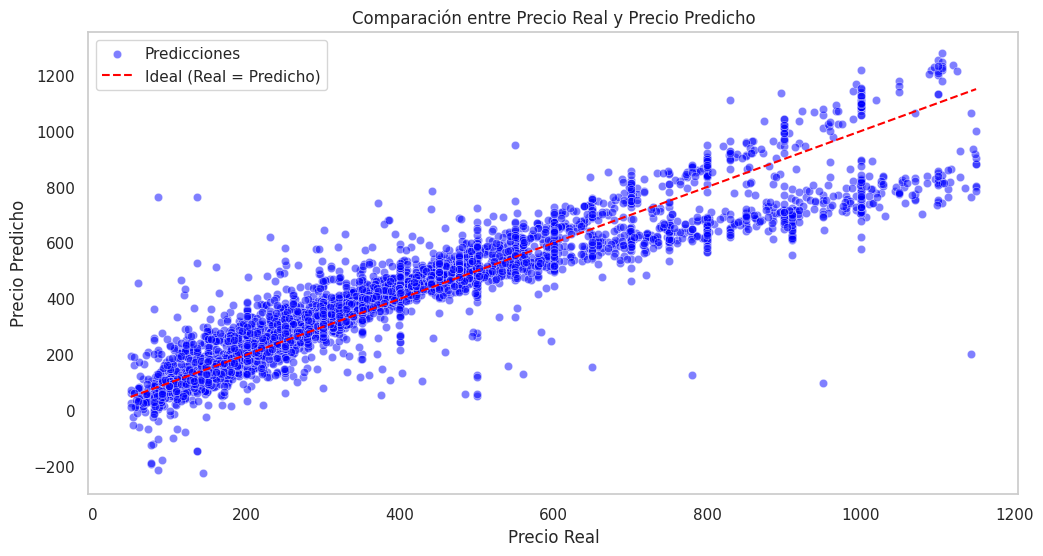

In [69]:
results = pd.DataFrame({
    'Precio Real': y_test,
    'Precio Predicho': y_pred_test
})

# Graficar
plt.figure(figsize=(12, 6))
sns.scatterplot(data=results, x='Precio Real', y='Precio Predicho', color='blue', alpha=0.5, label='Predicciones')
plt.plot([results['Precio Real'].min(), results['Precio Real'].max()],
         [results['Precio Real'].min(), results['Precio Real'].max()],
         color='red', linestyle='--', label='Ideal (Real = Predicho)')
plt.title('Comparación entre Precio Real y Precio Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend()
plt.grid()
plt.show()

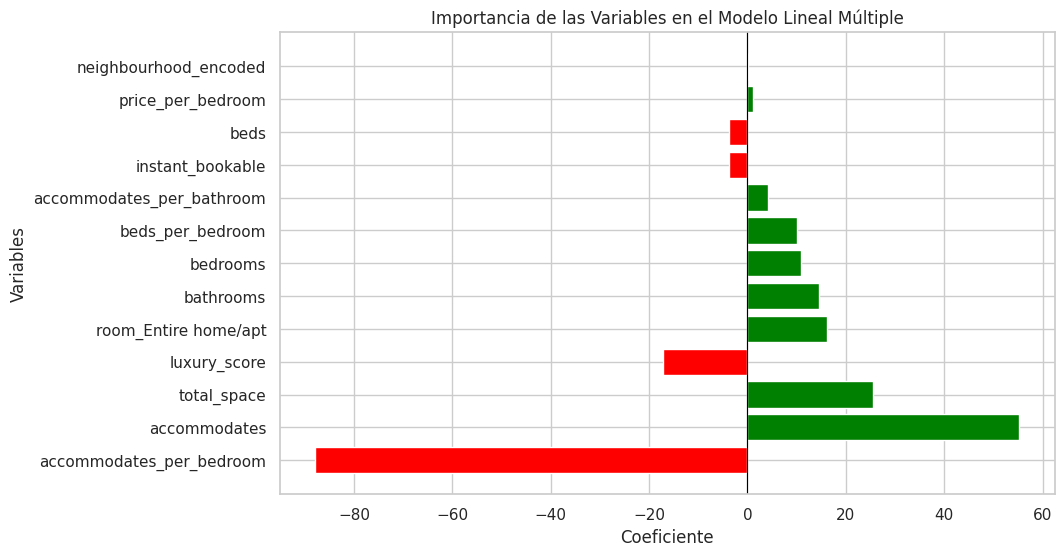

In [70]:
coef_df = pd.DataFrame({
    'Variable': ['accommodates_per_bedroom', 'accommodates', 'total_space',
                 'room_Entire home/apt', 'beds_per_bedroom', 'luxury_score',
                 'instant_bookable', 'bathrooms', 'bedrooms',
                 'price_per_bedroom', 'accommodates_per_bathroom', 'beds','neighbourhood_encoded'],
    'Coeficiente': [-87.975403, 55.259145, 25.439473, 16.179468,
                    10.069016, -17.226250, -3.847833, 14.492941,
                    10.946531, 1.131501, 4.084701, -3.675128, 0.117633]
})

# Ordenar el DataFrame por el valor absoluto de los coeficientes
coef_df['Abs_Coeficiente'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Abs_Coeficiente', ascending=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'], color=['green' if x > 0 else 'red' for x in coef_df['Coeficiente']])
plt.axvline(0, color='black', lw=0.8)
plt.title('Importancia de las Variables en el Modelo Lineal Múltiple')
plt.xlabel('Coeficiente')
plt.ylabel('Variables')
plt.show()

## XGBoost

In [71]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
X = dataSet.drop('price', axis=1)
y = dataSet['price']

# Divide el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Definir el rango de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0]
}

In [74]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Aquí usas 5 folds

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Puedes usar 'r2' o 'neg_mean_squared_error'
                           cv=kf,
                           verbose=1,
                           n_jobs=-1)

In [75]:
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [76]:
# Predicciones
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calcular métricas
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"Entrenamiento: MSE = {mse_train}, R² = {r2_train}, RMSE = {rmse_train}")
print(f"Evaluación: MSE = {mse_test}, R² = {r2_test}, RMSE = {rmse_test}")


Entrenamiento: MSE = 548.2338114636146, R² = 0.9903446904413639, RMSE = 23.41439325422751
Evaluación: MSE = 651.1056335448185, R² = 0.9884386616286, RMSE = 25.516771612898417


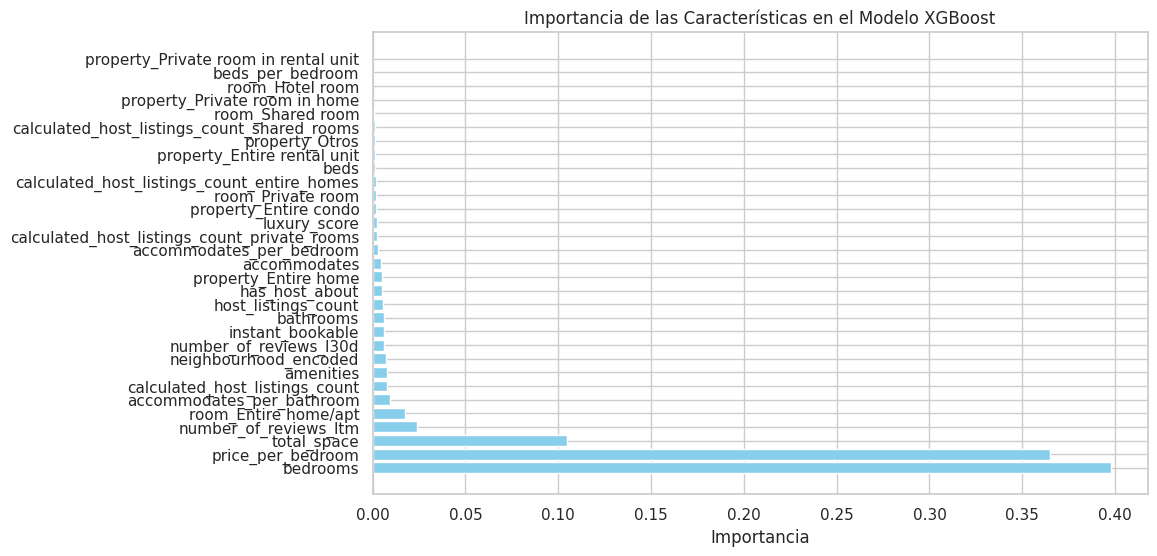

In [77]:
# Obtener las importancias de las características
importances = best_model.feature_importances_

# Crear un DataFrame con las importancias
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Modelo XGBoost')
plt.show()

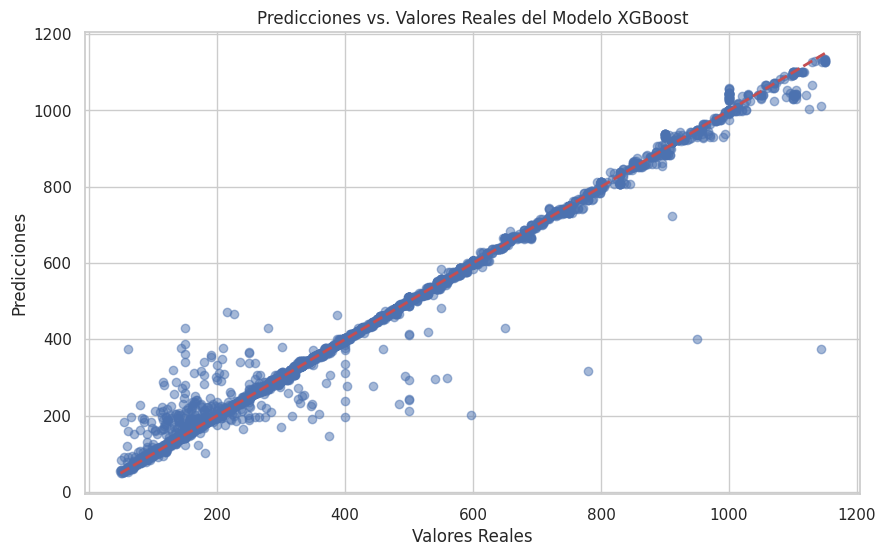

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales del Modelo XGBoost')
plt.show()

Modelo 3: a elección
● En este punto se debe entrenar (mediante cross-validation) un modelo elegido por el
grupo. Se debe evaluar su performance en entrenamiento y sobre el conjunto de
evaluación explicando todas las métricas.

## Modelo 3


In [79]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Entrenamiento: MSE = 15658.618442290222, R² = 0.7242256767833155, RMSE = 125.13440151409293
Evaluación: MSE = 15544.950615224594, R² = 0.7239765334990863, RMSE = 124.67939130114726


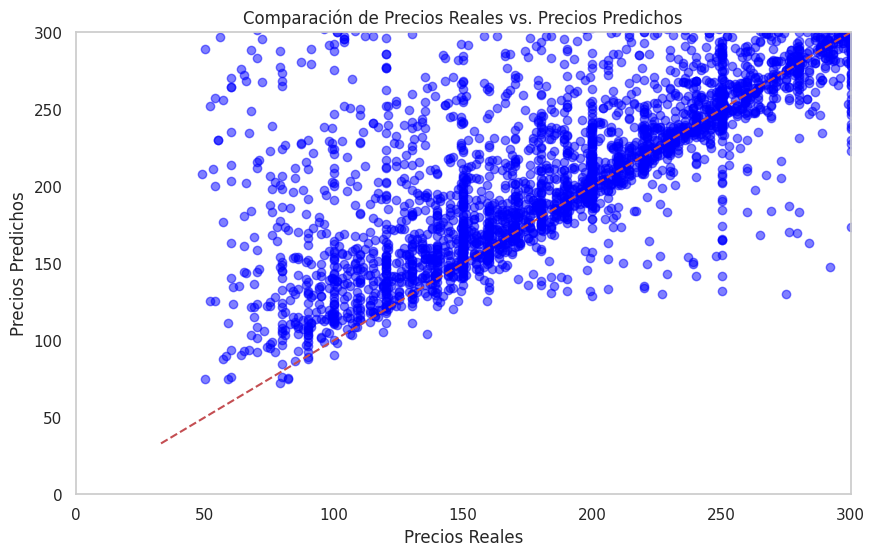

In [80]:
X = dataSet.drop('price', axis=1)
y = dataSet['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Imprimir resultados
print(f'Entrenamiento: MSE = {mse_train}, R² = {r2_train}, RMSE = {rmse_train}')
print(f'Evaluación: MSE = {mse_test}, R² = {r2_test}, RMSE = {rmse_test}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Precios Reales')
plt.ylabel('Precios Predichos')
plt.title('Comparación de Precios Reales vs. Precios Predichos')
plt.xlim([0, 300])
plt.ylim([0, 300])
plt.grid()
plt.show()

#Cuadro comparativo

**c) Cuadro de resultados: armar un cuadro comparativo de los resultados obtenidos con los
modelos y responder la siguiente pregunta ¿Qué modelo elegirían para predecir el precio de alquiler de un Airbnb en la ciudad seleccionada?


In [81]:
data = {
    'Modelo': ['Modelo Lineal Múltiple', 'XGBoost', 'Support Vector Machine (SVM)'],
    'MSE Entrenamiento': [7410.30, 548.23, 15658.62],
    'R² Entrenamiento': [0.8594, 0.9903, 0.7242],
    'RMSE Entrenamiento': [86.08, 23.41, 125.13],
    'MSE Evaluación': [7410.30, 651.11, 15544.95],
    'R² Evaluación': [0.8593, 0.9884, 0.7240],
    'RMSE Evaluación': [89.27, 25.52, 124.68]
}

# Crear el DataFrame
results_df = pd.DataFrame(data)

# Mostrar el DataFrame
results_df

,Modelo,MSE Entrenamiento,R² Entrenamiento,RMSE Entrenamiento,MSE Evaluación,R² Evaluación,RMSE Evaluación
0,Modelo Lineal Múltiple,7410.30,0.8594,86.08,7410.30,0.8593,89.27
1,XGBoost,548.23,0.9903,23.41,651.11,0.9884,25.52
2,Support Vector Machine (SVM),15658.62,0.7242,125.13,15544.95,0.7240,124.68


**Modelo Lineal Múltiple:**

* **Ventajas:** R² relativamente alto en entrenamiento y
evaluación, lo que indica que es capaz de explicar bien la variabilidad en los precios. RMSE razonable, pero no el mejor.
* **Desventajas:** Presenta un MSE más elevado en comparación con los otros modelos.

**XGBoost:**

* **Ventajas:** Excelente rendimiento, con el MSE más bajo y
un R² muy alto tanto en el conjunto de entrenamiento como en el de evaluación. RMSE más bajo, lo que indica que las predicciones son muy cercanas a los valores reales.
* **Desventajas:** Puede ser más complejo de implementar y requerir más ajuste de hiperparámetros.

**Support Vector Machine (SVM):**

* **Ventajas:** Modelo relativamente sencillo de entender y utilizar.
* **Desventajas:** Tiene el mayor MSE y RMSE, lo que indica un rendimiento inferior en comparación con los otros dos modelos. Esto significa que no es tan efectivo para predecir los precios de alquiler en este caso.

Después de realizar un análisis exhaustivo de los diferentes modelos de predicción, hemos llegado a la conclusión de que el **modelo XGBoost es el más adecuado para predecir el precio de alquiler de un Airbnb** en la ciudad seleccionada. Este modelo presenta un alto valor de R² y bajos valores de MSE y RMSE, lo que indica que ofrece las mejores predicciones en comparación con los otros modelos evaluados. Por lo tanto, consideramos que XGBoost es la opción óptima para este tipo de análisis.